In [ ]:
!git clone https://github.com/dayatsa/OpedQuadruped.git

Cloning into 'OpedQuadruped'...
remote: Enumerating objects: 812, done.
remote: Counting objects: 100% (812/812), done.
remote: Compressing objects: 100% (608/608), done.
remote: Total 812 (delta 457), reused 538 (delta 183), pack-reused 0
Receiving objects: 100% (812/812), 38.73 MiB | 11.80 MiB/s, done.
Resolving deltas: 100% (457/457), done.


In [ ]:
import os
import numpy
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import numpy as np
import random
from datetime import datetime

In [ ]:
def calculate_rise_time(t, y):
  ret = 0
  for i in range(len(y)):
    if y[i] > -1 and y[i] < 1:
      ret = t[i]
      break
  return ret


def calculate_overshoot(y):
  y = np.array(y[:100])
  ret = 0
  if y[0] < 0:
    ret = y.max()
  else:
    ret = -y.min()
  return ret


def calculate_average(data, target):
  index = 0
  val = 0
  for i in range(len(data)):
    if(data['legs_raised'][i] == 'n' and data['index'][i] >=300 and data["rise_time_" + target][i]>1 and abs(data["init_imu_" + target][i])>5):
      speed = abs(data["init_imu_" + target][i])/data["rise_time_" + target][i]
      val += speed
      index += 1
  print(val, index)
  return val/index

##Testing TRAIN

###roll

In [ ]:
path_train = "/content/OpedQuadruped/oped/oped_teleopp/rewards/test_train/x"
list_dir_train = sorted(os.listdir(path_train))
list_dir_train

['reward_22-01-2022_22-47.json', 'reward_28-01-2022_13-09.json']

In [ ]:
with open(os.path.join(path_train, list_dir_train[-1])) as f:
    data = json.load(f)
data_testing_train = data
len(data_testing_train)

19

In [ ]:
df_train = pd.json_normalize(data_testing_train)
# df_train.head()

In [ ]:
data_table_train = []
data_reward_train = []
episode = 0
for i in range(19):
  data = []
  sum_reward = []
  for j in range(1):
    if (df_train["legs_raised"][episode] == "n" and df_train["index"][episode] >= 300):
      val = 1
    else:
      val = 0
    sum_reward.append(df_train["reward_x"][episode] + df_train["reward_y"][episode])
    data.append(val)
    episode += 1
  data_reward_train.append(sum_reward)
  data_table_train.append(data)

print(data_table_train)

[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]


In [ ]:
index_full_train = []
index = df_train.index[df_train['reward_x'] > 2000].tolist()
for id in index:
  if df_train['reward_y'][id] > 2000 and df_train['legs_raised'][id] == 'n':
    index_full_train.append(id)

print(index_full_train)
print(len(index_full_train))

[3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
14


Episode :  3
Reward :  2490 2750
Leg raised :  n

Init x: -18.25, y : 0.71
Overshoot x: 0.34, y : -0.22
Rise time x : 0.82, y : 0.00


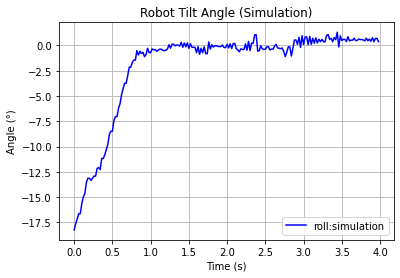

Episode :  5
Reward :  2670 2730
Leg raised :  n

Init x: -12.45, y : 0.66
Overshoot x: 1.23, y : -0.39
Rise time x : 0.42, y : 0.00


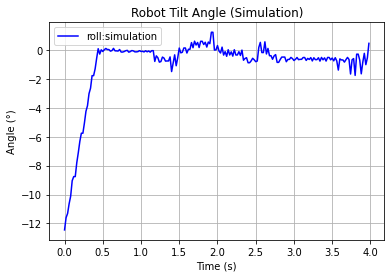

Episode :  6
Reward :  2780 3000
Leg raised :  n

Init x: -9.40, y : 0.39
Overshoot x: 0.45, y : -0.39
Rise time x : 0.36, y : 0.00


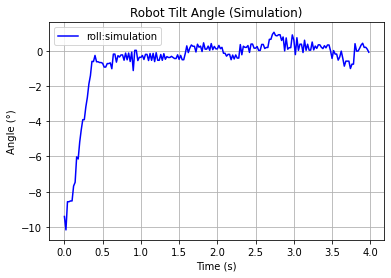

Episode :  7
Reward :  2840 3000
Leg raised :  n

Init x: -6.54, y : 0.78
Overshoot x: 1.32, y : -0.31
Rise time x : 0.22, y : 0.00


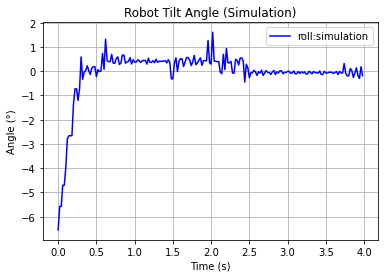

Episode :  8
Reward :  2850 3000
Leg raised :  n

Init x: -2.62, y : 0.60
Overshoot x: 1.12, y : -0.52
Rise time x : 0.10, y : 0.00


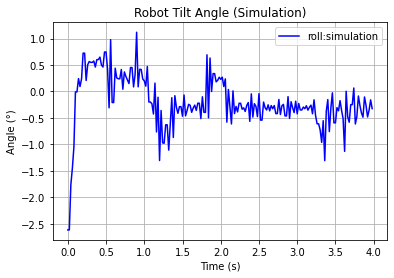

Episode :  9
Reward :  2830 3000
Leg raised :  n

Init x: -0.13, y : 0.64
Overshoot x: 1.06, y : -0.19
Rise time x : 0.00, y : 0.00


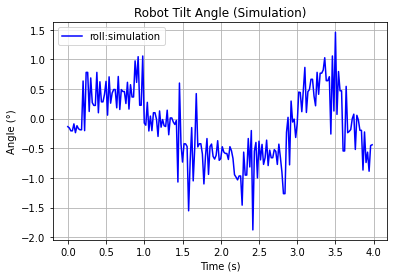

Episode :  10
Reward :  2830 3000
Leg raised :  n

Init x: 3.17, y : 0.61
Overshoot x: 1.06, y : -0.45
Rise time x : 0.14, y : 0.00


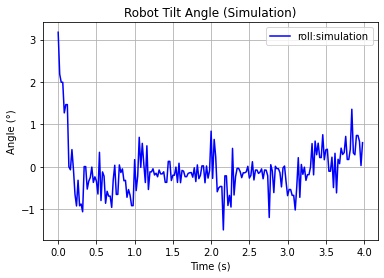

Episode :  11
Reward :  2730 3000
Leg raised :  n

Init x: 6.07, y : 0.55
Overshoot x: 1.74, y : -0.38
Rise time x : 0.24, y : 0.00


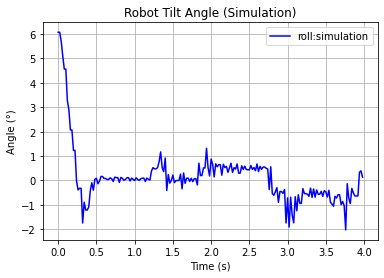

Episode :  12
Reward :  2760 2870
Leg raised :  n

Init x: 9.28, y : 0.63
Overshoot x: 1.61, y : -0.46
Rise time x : 0.30, y : 0.00


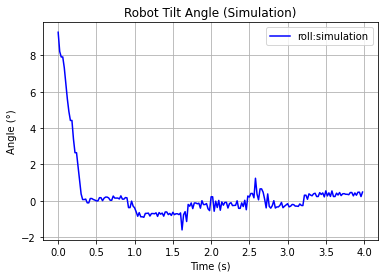

Episode :  13
Reward :  2670 3000
Leg raised :  n

Init x: 12.27, y : 0.68
Overshoot x: 1.29, y : -0.27
Rise time x : 0.46, y : 0.00


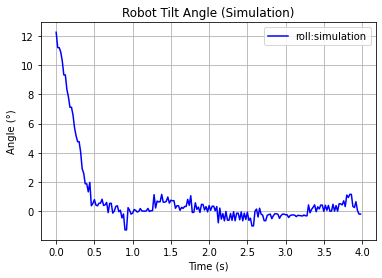

Episode :  14
Reward :  2620 3000
Leg raised :  n

Init x: 15.18, y : 0.38
Overshoot x: 0.87, y : 0.14
Rise time x : 0.64, y : 0.00


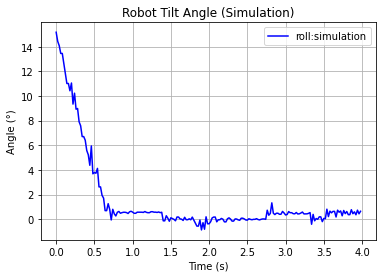

Episode :  15
Reward :  2600 2980
Leg raised :  n

Init x: 18.18, y : 0.64
Overshoot x: -0.11, y : 0.10
Rise time x : 0.72, y : 0.00


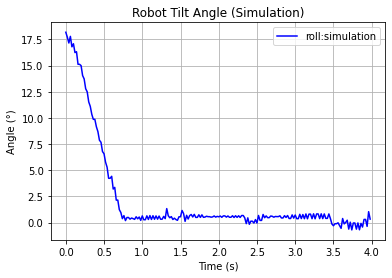

Episode :  16
Reward :  2490 3000
Leg raised :  n

Init x: 21.19, y : 0.74
Overshoot x: 0.44, y : 0.27
Rise time x : 0.80, y : 0.00


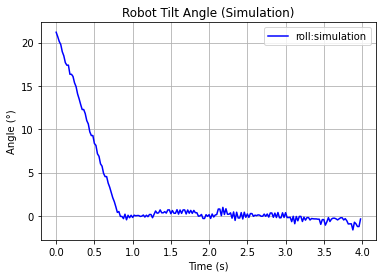

Episode :  17
Reward :  2420 2990
Leg raised :  n

Init x: 23.97, y : 0.53
Overshoot x: 0.49, y : 0.24
Rise time x : 1.10, y : 0.00


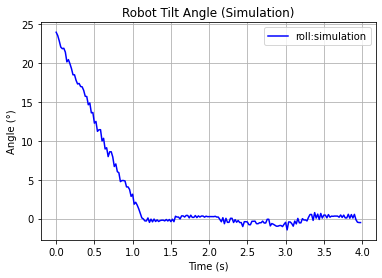

In [ ]:
# episode = np.random.randint(0,289)
# episode  = random.choice(index_full_train)

def showGraph(episode):
  imu_x = df_train["data.imu_x"][episode]
  imu_y = df_train["data.imu_y"][episode]
  servo_y = df_train["data.servo_y"][episode]
  index = df_train["data.index"][episode]
  set_point = [0 for i in range(300)]
  time = [i*(1/50) for i in range(300)]

  print("Episode : ", episode)
  print("Reward : ", df_train["reward_x"][episode], df_train["reward_y"][episode])
  print("Leg raised : ", df_train["legs_raised"][episode])
  print("\nInit x: {:.2f}, y : {:.2f}".format(df_train['data.imu_x'][episode][0], df_train['data.imu_y'][episode][0]))
  print("Overshoot x: {:.2f}, y : {:.2f}".format(calculate_overshoot(imu_x), calculate_overshoot(imu_y)))
  print("Rise time x : {:.2f}, y : {:.2f}".format(calculate_rise_time(time, imu_x), calculate_rise_time(time, imu_y)))


  fig, ax = plt.subplots()
  ax.plot(time[:-100], imu_x[:-100], label="roll:simulation", color="blue")
  ax.set(title = "Robot Tilt Angle (Simulation)",
        xlabel = "Time (s)",
        ylabel = "Angle (°)")

  plt.legend()
  plt.grid()
  plt.show()

for i in index_full_train:
  showGraph(i)

In [ ]:
time = [i*(1/50) for i in range(300)]
dt_rise_time = []
dt_overshoot = []

for i in range(len(df_train)):
  dt_rise_time.append(calculate_rise_time(time, df_train["data.imu_x"][i]))
  dt_overshoot.append(calculate_overshoot(df_train["data.imu_x"][i]))

df_filter = df_train.copy()
df_filter['rise_time'] = dt_rise_time
df_filter['overshoot'] = dt_overshoot
df_filter = df_filter[df_filter['reward_x'] > 2000]
df_filter = df_filter.drop(['reward_y', 'last_imu_y', 'init_imu_y', 'data.index', 'data.imu_y', 'data.imu_x', 'data.act_x', 'data.act_y', 'data.servo_y', 'data.servo_x'], axis=1)
df_filter.to_excel("testing_train_roll.xlsx")  
df_filter

,index,episode,last_imu_x,reward_x,legs_raised,init_imu_x,rise_time,overshoot
0,300,0,-0.089980,2360,n,-26.974120,1.24,0.075313
1,300,1,-0.255162,2390,n,-24.321606,1.02,0.567094
2,300,2,0.410326,2490,n,-21.088245,1.02,0.898617
3,300,3,0.078801,2490,n,-18.425245,0.82,0.335838
4,300,4,0.326595,2590,n,-15.294551,0.66,0.433578
5,300,5,0.813500,2670,n,-12.261982,0.42,1.229747
6,300,6,-0.125696,2780,n,-9.057260,0.36,0.446125
7,300,7,0.011790,2840,n,-6.466267,0.22,1.322072
8,300,8,-0.142935,2850,n,-3.057220,0.10,1.119891
9,300,9,-1.610090,2830,n,-0.216886,0.00,1.057067


###pitch

In [ ]:
path_train = "/content/OpedQuadruped/oped/oped_teleopp/rewards/test_train/y"
list_dir_train = sorted(os.listdir(path_train))
list_dir_train

['reward_22-01-2022_23-01.json', 'reward_28-01-2022_13-01.json']

In [ ]:
with open(os.path.join(path_train, list_dir_train[-1])) as f:
    data = json.load(f)
data_testing_train = data
len(data_testing_train)

19

In [ ]:
df_train = pd.json_normalize(data_testing_train)
# df_train.head()

In [ ]:
data_table_train = []
data_reward_train = []
episode = 0
for i in range(1):
  data = []
  sum_reward = []
  for j in range(19):
    if (df_train["legs_raised"][episode] == "n" and df_train["index"][episode] >= 300):
      val = 1
    else:
      val = 0
    sum_reward.append(df_train["reward_x"][episode] + df_train["reward_y"][episode])
    data.append(val)
    episode += 1
  data_reward_train.append(sum_reward)
  data_table_train.append(data)

print(data_table_train)

[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]]


In [ ]:
index_full_train = []
index = df_train.index[df_train['reward_x'] > 2000].tolist()
for id in index:
  if df_train['reward_y'][id] > 2000 and df_train['legs_raised'][id] == 'n':
    index_full_train.append(id)

print(index_full_train)
print(len(index_full_train))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
14


Episode :  2
Reward :  2670 2430
Leg raised :  n

Init x: 0.08, y : -21.49

Overshoot x: 1.48, y : -0.11
Rise time x : 0.00, y : 0.90


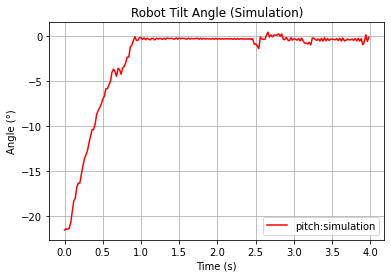

Episode :  3
Reward :  3000 2590
Leg raised :  n

Init x: 0.28, y : -18.47

Overshoot x: 0.56, y : 1.08
Rise time x : 0.00, y : 0.72


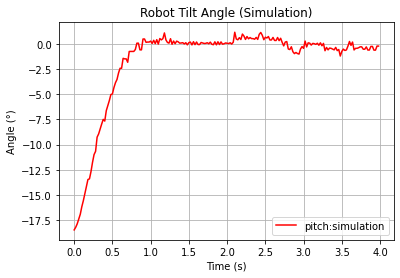

Episode :  4
Reward :  3000 2700
Leg raised :  n

Init x: -0.18, y : -15.37

Overshoot x: 0.28, y : -0.02
Rise time x : 0.00, y : 0.48


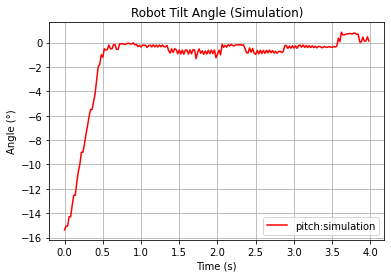

Episode :  5
Reward :  3000 2660
Leg raised :  n

Init x: 0.03, y : -12.20

Overshoot x: 0.14, y : 1.09
Rise time x : 0.00, y : 0.52


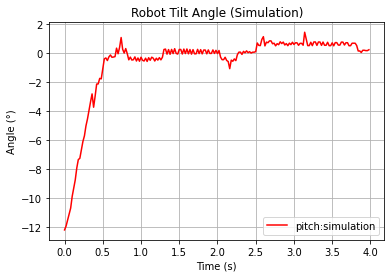

Episode :  6
Reward :  3000 2750
Leg raised :  n

Init x: 0.05, y : -9.17

Overshoot x: 0.31, y : 0.84
Rise time x : 0.00, y : 0.36


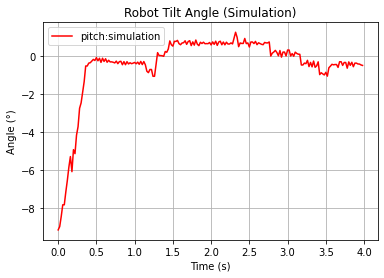

Episode :  7
Reward :  3000 2810
Leg raised :  n

Init x: -0.02, y : -5.72

Overshoot x: 0.09, y : 1.10
Rise time x : 0.00, y : 0.26


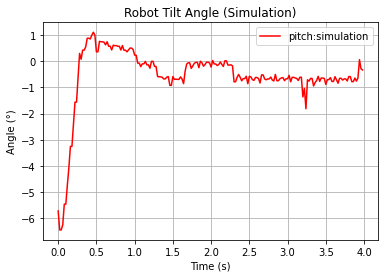

Episode :  8
Reward :  3000 2930
Leg raised :  n

Init x: 0.13, y : -2.29

Overshoot x: -0.03, y : 1.38
Rise time x : 0.00, y : 0.08


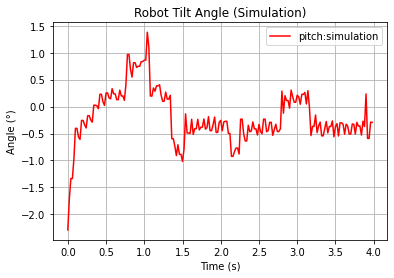

Episode :  9
Reward :  3000 2900
Leg raised :  n

Init x: 0.07, y : 1.06

Overshoot x: 0.01, y : 0.86
Rise time x : 0.00, y : 0.04


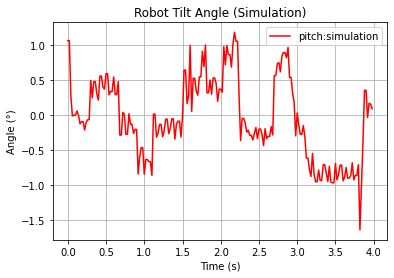

Episode :  10
Reward :  3000 2880
Leg raised :  n

Init x: -0.19, y : 3.39

Overshoot x: 0.02, y : 1.42
Rise time x : 0.00, y : 0.14


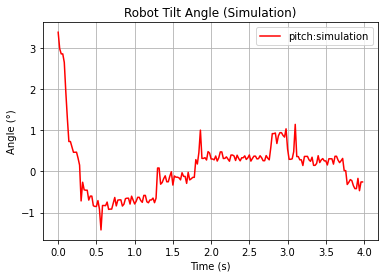

Episode :  11
Reward :  3000 2790
Leg raised :  n

Init x: 0.08, y : 6.56

Overshoot x: 0.23, y : 1.46
Rise time x : 0.00, y : 0.24


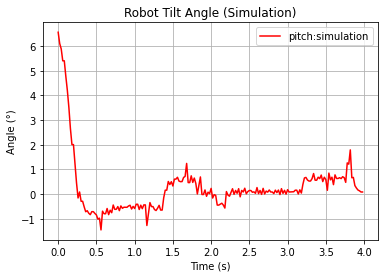

Episode :  12
Reward :  3000 2790
Leg raised :  n

Init x: 0.22, y : 10.35

Overshoot x: 0.18, y : 1.20
Rise time x : 0.00, y : 0.32


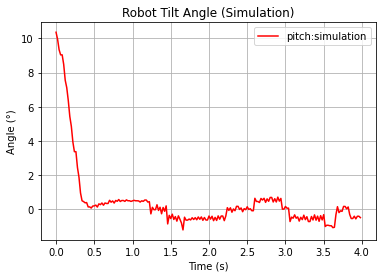

Episode :  13
Reward :  3000 2700
Leg raised :  n

Init x: -0.03, y : 13.78

Overshoot x: 0.36, y : 0.14
Rise time x : 0.00, y : 0.46


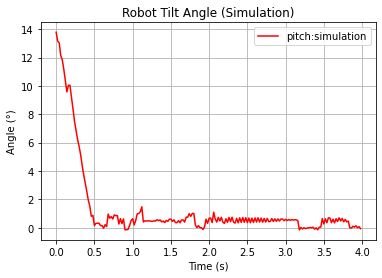

Episode :  14
Reward :  3000 2590
Leg raised :  n

Init x: 0.07, y : 16.50

Overshoot x: 0.31, y : 0.10
Rise time x : 0.00, y : 0.66


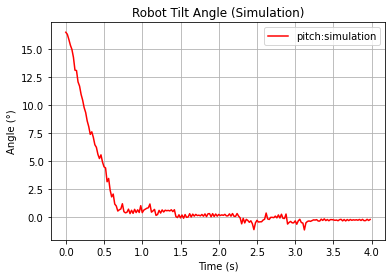

Episode :  15
Reward :  3000 2570
Leg raised :  n

Init x: 0.08, y : 19.77

Overshoot x: 0.69, y : 0.28
Rise time x : 0.00, y : 0.82


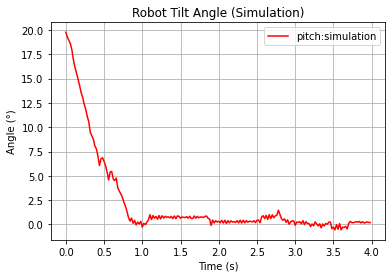

In [ ]:
# episode = np.random.randint(0,289)
# episode  = random.choice(index_full_train)

def showGraph(episode):
  imu_x = df_train["data.imu_x"][episode]
  imu_y = df_train["data.imu_y"][episode]
  servo_y = df_train["data.servo_y"][episode]
  index = df_train["data.index"][episode]
  set_point = [0 for i in range(300)]
  time = [i*(1/50) for i in range(300)]

  print("Episode : ", episode)
  print("Reward : ", df_train["reward_x"][episode], df_train["reward_y"][episode])
  print("Leg raised : ", df_train["legs_raised"][episode])
  print("\nInit x: {:.2f}, y : {:.2f}".format(df_train['data.imu_x'][episode][0], df_train['data.imu_y'][episode][0]))
  print("\nOvershoot x: {:.2f}, y : {:.2f}".format(calculate_overshoot(imu_x), calculate_overshoot(imu_y)))
  print("Rise time x : {:.2f}, y : {:.2f}".format(calculate_rise_time(time, imu_x), calculate_rise_time(time, imu_y)))


  fig, ax = plt.subplots()
  ax.plot(time[:-100], imu_y[:-100], label="pitch:simulation", color="red")
  # Set plot title and axes labels
  ax.set(title = "Robot Tilt Angle (Simulation)",
        xlabel = "Time (s)",
        ylabel = "Angle (°)")

  plt.legend()
  plt.grid()
  plt.show()

for i in index_full_train:
  showGraph(i)

In [ ]:
time = [i*(1/50) for i in range(300)]
dt_rise_time = []
dt_overshoot = []

for i in range(len(df_train)):
  dt_rise_time.append(calculate_rise_time(time, df_train["data.imu_y"][i]))
  dt_overshoot.append(calculate_overshoot(df_train["data.imu_y"][i]))

df_filter = df_train.copy()
df_filter['rise_time'] = dt_rise_time
df_filter['overshoot'] = dt_overshoot
# df_filter = df_filter[df_filter['reward_y'] > 2000]
df_filter = df_filter.drop(['reward_x', 'last_imu_x', 'init_imu_x', 'data.index', 'data.imu_y', 'data.imu_x', 'data.act_x', 'data.act_y', 'data.servo_y', 'data.servo_x'], axis=1)
df_filter.to_excel("testing_train_pitch.xlsx")  
df_filter

,index,episode,reward_y,last_imu_y,legs_raised,init_imu_y,rise_time,overshoot
0,207,0,820,-30.000000,n,-27.407295,1.50,0.812559
1,261,1,1550,-30.000000,n,-24.706429,1.08,1.009463
2,300,2,2430,0.353780,n,-21.510783,0.90,-0.109994
3,300,3,2590,0.237232,n,-18.452152,0.72,1.077198
4,300,4,2700,0.122874,n,-15.374047,0.48,-0.015555
5,300,5,2660,-0.277144,n,-12.241906,0.52,1.085808
6,300,6,2750,0.467704,n,-9.165659,0.36,0.842684
7,300,7,2810,0.046625,n,-5.883513,0.26,1.101680
8,300,8,2930,0.114612,n,-1.990015,0.08,1.379091
9,300,9,2900,0.101580,n,0.997400,0.04,0.863188


###roll & pitch

In [ ]:
path_train = "/content/OpedQuadruped/oped/oped_teleopp/rewards/test_train/1"
list_dir_train = sorted(os.listdir(path_train))
list_dir_train

['reward_28-01-2022_12-52.json']

In [ ]:
with open(os.path.join(path_train, list_dir_train[0])) as f: #1
    data = json.load(f)

data_keys = data[0].keys()
data_sub_keys = data[0]["data"].keys()
print(data_keys)
print(data_sub_keys)

dict_keys(['index', 'episode', 'last_imu_x', 'reward_y', 'reward_x', 'last_imu_y', 'legs_raised', 'data', 'init_imu_y', 'init_imu_x'])
dict_keys(['index', 'imu_y', 'imu_x', 'act_x', 'act_y', 'servo_y', 'servo_x'])


In [ ]:
# with open(os.path.join(path_train, list_dir_train[0])) as f:
#     data = json.load(f)
# first_data = data[:-17]

# with open(os.path.join(path_train, list_dir_train[1])) as f:
#     data = json.load(f)
# second_data = data

# data_testing_train = first_data + second_data

with open(os.path.join(path_train, list_dir_train[-1])) as f: #-3
    data = json.load(f)
data_testing_train = data
len(data_testing_train)

361

In [ ]:
df_train = pd.json_normalize(data_testing_train)
df_train.head()

,index,episode,last_imu_x,reward_y,reward_x,last_imu_y,legs_raised,init_imu_y,init_imu_x,data.index,data.imu_y,data.imu_x,data.act_x,data.act_y,data.servo_y,data.servo_x
0,300,0,-8.695665,0,0,-14.661373,y,-19.865642,-21.822688,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-19.47510851911129, -19.47510851911129, -19.0...","[-21.123980716649434, -21.123980716649434, -20...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0.58, 1.16, 1.7399999999999998, 2.32, 2.9, 3....","[0.58, 1.16, 1.7399999999999998, 2.32, 2.9, 3...."
1,300,1,-8.893548,0,0,-10.147247,y,-19.614938,-22.030914,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-19.89054282369638, -19.89054282369638, -19.1...","[-21.80401943394784, -21.80401943394784, -21.3...","[2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0.58, 1.16, 1.7399999999999998, 2.32, 2.9, 3....","[0.58, 1.16, 0.58, 1.16, 1.7399999999999998, 2..."
2,300,2,-18.273273,0,0,-6.281495,y,-18.233405,-23.656314,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-18.233405004961, -18.269248970759982, -18.26...","[-23.65631418879661, -23.3021356879336, -23.30...","[2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, ...","[-0.58, 0.0, 0.58, 1.16, 1.7399999999999998, 2...","[0.58, 1.16, 1.7399999999999998, 2.32, 2.9, 2...."
3,300,3,-17.090087,0,0,-6.874604,y,-16.942236,-24.665807,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-16.942235835078872, -16.494956541884672, -16...","[-24.665806976622875, -24.207380392826888, -24...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0.58, 1.16, 1.7399999999999998, 2.32, 2.9, 3....","[0.58, 1.16, 1.7399999999999998, 2.32, 2.9, 3...."
4,300,4,-17.239847,0,0,-6.086882,y,-14.672052,-26.213709,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-14.976283229678367, -14.976283229678367, -14...","[-26.153610080237762, -26.153610080237762, -25...","[2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0.58, 1.16, 1.7399999999999998, 2.32, 2.9, 3....","[0.58, 0.58, 1.16, 1.7399999999999998, 2.32, 2..."


In [ ]:
df_train['init_imu_x'].min()
[i for i in range(-27,28,3)]

[-27, -24, -21, -18, -15, -12, -9, -6, -3, 0, 3, 6, 9, 12, 15, 18, 21, 24, 27]

In [ ]:
data_table_train = []
data_reward_train = []
episode = 0
max_reward = 0
init_imu = [0,0]
for i in range(19):
  data = []
  sum_reward = []
  for j in range(19):
    if (df_train["legs_raised"][episode] == "n" and df_train["index"][episode] >= 300):
      val = 1
    else:
      val = 0
    
    reward = df_train["reward_x"][episode] + df_train["reward_y"][episode]
    if reward > max_reward:
      max_reward = reward
      init_imu = [df_train['init_imu_x'][episode], df_train["init_imu_y"][episode]]
    sum_reward.append(reward)
    data.append(val)
    episode += 1
  data_reward_train.append(sum_reward)
  data_table_train.append(data)

print(data_table_train)
print("max reward: ", max_reward, init_imu)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 

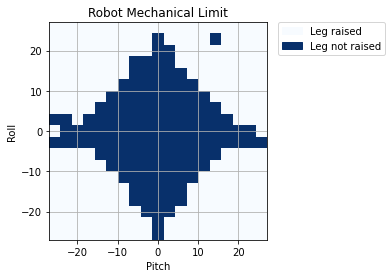

In [ ]:
import matplotlib.patches as mpatches

data = np.array(data_table_train)
values = np.unique(data.ravel())
plt.figure()
im = plt.imshow(data, interpolation='none', cmap="Blues", extent=[-27,27,-27,27])
colors = [ im.cmap(im.norm(value)) for value in values]
# patches = [ mpatches.Patch(color=colors[i], label="Leg raised: {l}".format(l=values[i]) ) for i in range(len(values)) ]
patches = [mpatches.Patch(color=colors[0], label="Leg raised"),
           mpatches.Patch(color=colors[1], label="Leg not raised")]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Robot Mechanical Limit')
plt.xlabel('Pitch')
plt.ylabel('Roll')
plt.grid(True)
plt.show()

[Text(0.5, 0, 'Total Sum Reward'),
 Text(0.5, 0, 'Roll'),
 Text(0.5, 0, 'Pitch'),
 Text(0.5, 0.92, 'Earning Rewards vs Tilt Angle')]

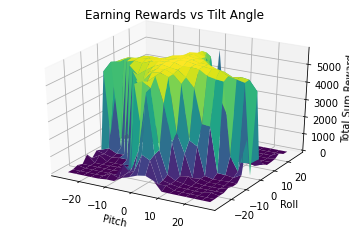

In [ ]:
x = [i for i in range(-27,28,3)]
y = [i for i in range(-27,28,3)]

X, Y = np.meshgrid(x, y)
Z = np.array(data_reward_train)

fig, ax = plt.subplots()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set(title = "Earning Rewards vs Tilt Angle",
       xlabel = "Pitch",
       ylabel = "Roll",
       zlabel = "Total Sum Reward")


In [ ]:
index_full_train = []
index = df_train.index[df_train['reward_x'] > 1000].tolist()
for id in index:
  if df_train['reward_y'][id] > 1000 and df_train['legs_raised'][id] == 'n' and abs(df_train['init_imu_x'][id]) > 8 and abs(df_train['init_imu_x'][id]) < 14 and abs(df_train['init_imu_y'][id]) > 8 and abs(df_train['init_imu_y'][id]) < 14:
    index_full_train.append(id)

print(index_full_train)
print(len(index_full_train))

[101, 119, 120, 233, 234, 240, 241, 253]
8


Episode :  101
Reward :  2520 2480
Leg raised :  n

Init x: -11.81, y : -9.32
Overshoot x: 0.88, y : 1.13
Rise time x : 0.38, y : 0.32


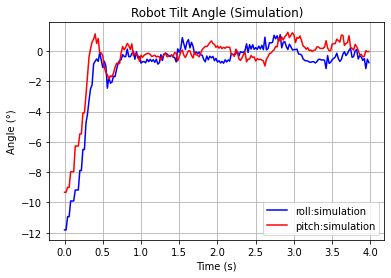

Episode :  119
Reward :  2660 2630
Leg raised :  n

Init x: -8.32, y : -12.17
Overshoot x: 1.75, y : 0.97
Rise time x : 0.36, y : 0.46


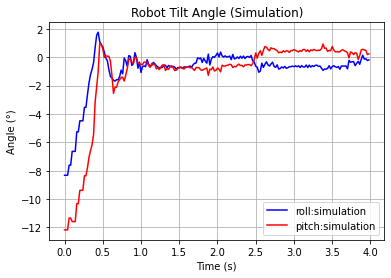

Episode :  120
Reward :  2200 2270
Leg raised :  n

Init x: -8.37, y : -8.74
Overshoot x: 2.99, y : 3.55
Rise time x : 0.40, y : 0.40


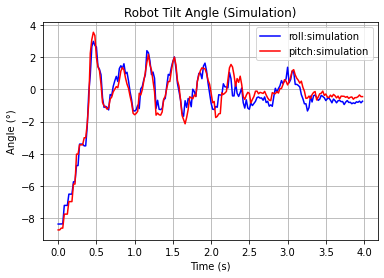

Episode :  233
Reward :  2630 2490
Leg raised :  n

Init x: 8.98, y : -12.55
Overshoot x: 3.77, y : 3.07
Rise time x : 0.48, y : 0.64


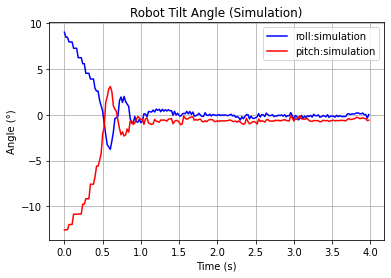

Episode :  234
Reward :  1340 1310
Leg raised :  n

Init x: 8.44, y : -8.93
Overshoot x: 2.23, y : 2.47
Rise time x : 0.36, y : 0.38


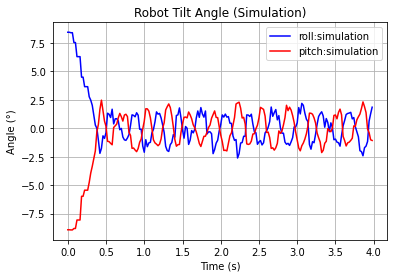

Episode :  240
Reward :  1160 1110
Leg raised :  n

Init x: 8.71, y : 10.40
Overshoot x: 2.71, y : 3.35
Rise time x : 0.48, y : 0.46


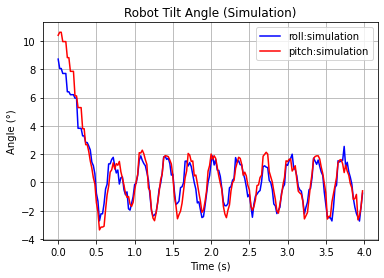

Episode :  241
Reward :  1750 1640
Leg raised :  n

Init x: 8.94, y : 13.64
Overshoot x: 3.54, y : 3.67
Rise time x : 0.36, y : 0.44


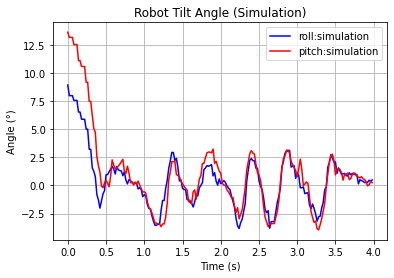

Episode :  253
Reward :  2560 2570
Leg raised :  n

Init x: 11.34, y : -9.21
Overshoot x: 1.75, y : 3.97
Rise time x : 0.48, y : 0.44


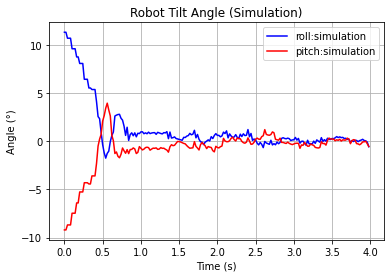

In [ ]:
# episode = np.random.randint(0,289)
# episode  = random.choice(index_full_train)

def showGraph(episode):
  imu_x = df_train["data.imu_x"][episode]
  imu_y = df_train["data.imu_y"][episode]
  servo_y = df_train["data.servo_y"][episode]
  index = df_train["data.index"][episode]
  set_point = [0 for i in range(300)]
  time = [i*(1/50) for i in range(300)]

  print("Episode : ", episode)
  print("Reward : ", df_train["reward_x"][episode], df_train["reward_y"][episode])
  print("Leg raised : ", df_train["legs_raised"][episode])
  print("\nInit x: {:.2f}, y : {:.2f}".format(df_train['data.imu_x'][episode][0], df_train['data.imu_y'][episode][0]))
  print("Overshoot x: {:.2f}, y : {:.2f}".format(calculate_overshoot(imu_x), calculate_overshoot(imu_y)))
  print("Rise time x : {:.2f}, y : {:.2f}".format(calculate_rise_time(time, imu_x), calculate_rise_time(time, imu_y)))


  fig, ax = plt.subplots()
  # ax.plot(time, set_point, label="set_point", color="black", linewidth=2)
  ax.plot(time[:-100], imu_x[:-100], label="roll:simulation", color="blue")
  ax.plot(time[:-100], imu_y[:-100], label="pitch:simulation", color="red")
  # Set plot title and axes labels
  ax.set(title = "Robot Tilt Angle (Simulation)",
        xlabel = "Time (s)",
        ylabel = "Angle (°)")

  plt.legend()
  plt.grid()
  plt.show()

for i in index_full_train:
  showGraph(i)

In [ ]:
time = [i*(1/50) for i in range(300)]
dt_rise_time_x = []
dt_overshoot_x = []
dt_rise_time_y = []
dt_overshoot_y = []

for i in range(len(df_train)):
  dt_rise_time_x.append(calculate_rise_time(time, df_train["data.imu_x"][i]))
  dt_overshoot_x.append(calculate_overshoot(df_train["data.imu_x"][i]))
  dt_rise_time_y.append(calculate_rise_time(time, df_train["data.imu_y"][i]))
  dt_overshoot_y.append(calculate_overshoot(df_train["data.imu_y"][i]))

df_filter = df_train.copy()
df_filter['rise_time_x'] = dt_rise_time_x
df_filter['overshoot_x'] = dt_overshoot_x
df_filter['rise_time_y'] = dt_rise_time_y
df_filter['overshoot_y'] = dt_overshoot_y
# df_filter = df_filter[df_filter['reward_x'] > 2000]
# df_filter = df_filter[df_filter['reward_y'] > 2000]
df_filter = df_filter.drop(['data.index', 'data.imu_y', 'data.imu_x', 'data.act_x', 'data.act_y', 'data.servo_y', 'data.servo_x'], axis=1)
# df_filter
df_filter.to_excel("testing_train.xlsx")  

##Testing OPED

###roll

In [ ]:
path = "/content/OpedQuadruped/oped/oped_teleopp/rewards/test_oped/x"
list_dir = sorted(os.listdir(path))
list_dir

['reward_25-01-2022_08-07.json', 'reward_26-01-2022_12-18.json']

In [ ]:
data_testing = []
# for i in range(len(list_dir)):
#   with open(os.path.join(path, list_dir[i])) as f:
#       data = json.load(f)
#       print(list_dir[i], len(data))
#       for j in range(len(data)):
#         data_testing.append(data[j])

with open(os.path.join(path, list_dir[-1])) as f:
    data = json.load(f)
data_testing = data

print(len(data_testing))

9


In [ ]:
df = pd.json_normalize(data_testing)
# df.head()

In [ ]:
index_full = []
index = df.index[df['reward_x'] > 1500].tolist()
for id in index:
  if df['legs raised'][id] == 'n':
    index_full.append(id)

print(index_full)
print(len(index_full))

[0, 1, 2, 4, 6]
5


Episode :  0
Reward :  1670 2870
Leg raised :  n

Init x: -14.72, y : 1.16
Overshoot x: 2.28, y : 0.34
Rise time x : 0.56, y : 0.10


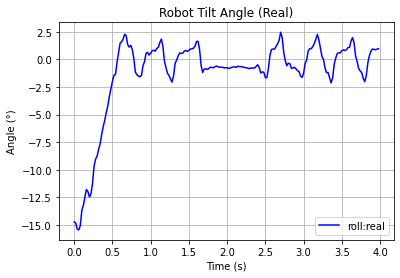

Episode :  1
Reward :  2750 2970
Leg raised :  n

Init x: -10.59, y : 0.82
Overshoot x: 2.67, y : -0.05
Rise time x : 0.40, y : 0.00


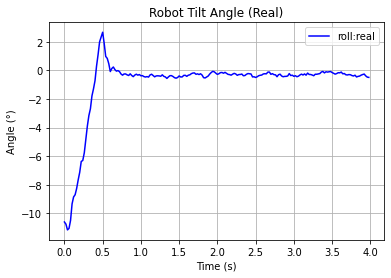

Episode :  2
Reward :  2340 2940
Leg raised :  n

Init x: -7.99, y : 0.52
Overshoot x: 2.84, y : 0.74
Rise time x : 0.34, y : 0.00


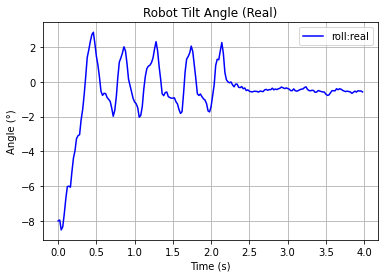

Episode :  4
Reward :  1560 460
Leg raised :  n

Init x: 5.78, y : 1.31
Overshoot x: 4.02, y : 0.08
Rise time x : 0.26, y : 0.08


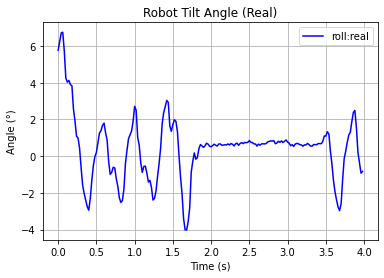

Episode :  6
Reward :  2700 60
Leg raised :  n

Init x: 10.65, y : 1.51
Overshoot x: 4.18, y : -0.21
Rise time x : 0.44, y : 0.28


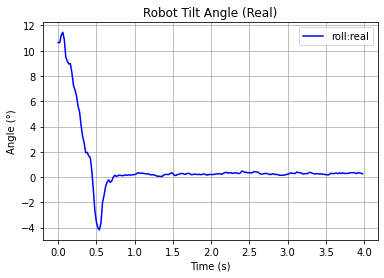

In [ ]:
# episode = np.random.randint(0,289)
# episode  = random.choice(index_full)
def showGraph(episode):
  imu_x = df["data.imu_x"][episode]
  imu_y = df["data.imu_y"][episode]
  servo_y = df["data.servo_y"][episode]
  index = df["data.index"][episode]
  set_point = [0 for i in range(300)]
  time = [i*(1/50) for i in range(300)]

  print("Episode : ", episode)
  print("Reward : ", df["reward_x"][episode], df["reward_y"][episode])
  print("Leg raised : ", df["legs raised"][episode])
  print("\nInit x: {:.2f}, y : {:.2f}".format(df['data.imu_x'][episode][0], df['data.imu_y'][episode][0]))
  print("Overshoot x: {:.2f}, y : {:.2f}".format(calculate_overshoot(imu_x), calculate_overshoot(imu_y)))
  print("Rise time x : {:.2f}, y : {:.2f}".format(calculate_rise_time(time, imu_x), calculate_rise_time(time, imu_y)))

  fig, ax = plt.subplots()
  ax.plot(time[:-100], imu_x[:-100], label="roll:real", color="blue")
  ax.set(title = "Robot Tilt Angle (Real)",
        xlabel = "Time (s)",
        ylabel = "Angle (°)")

  plt.legend()
  plt.grid()
  plt.show()

for i in index_full:
  showGraph(i)

In [ ]:
time = [i*(1/50) for i in range(300)]
dt_rise_time = []
dt_overshoot = []
init_imu_x = []

for i in range(len(df)):
  dt_rise_time.append(calculate_rise_time(time, df["data.imu_x"][i]))
  dt_overshoot.append(calculate_overshoot(df["data.imu_x"][i]))
  init_imu_x.append(df["data.imu_x"][i][0])

df_filter = df.copy()
df_filter['rise_time'] = dt_rise_time
df_filter['overshoot'] = dt_overshoot
df_filter['new_init_imu_x'] = init_imu_x
# df_filter = df_filter[df_filter['reward_x'] > 1000]
df_filter = df_filter.drop(['init_imu_x', 'reward_y', 'last_imu_y', 'init_imu_y', 'data.index', 'data.imu_y', 'data.imu_x', 'data.act_x', 'data.act_y', 'data.servo_y', 'data.servo_x'], axis=1)
df_filter.to_excel("testing_oped_roll.xlsx")  
df_filter

,index,legs raised,episode,last_imu_x,reward_x,rise_time,overshoot,new_init_imu_x
0,300,n,0,1.024665,1670,0.56,2.284906,-14.722595
1,300,n,1,0.280648,2750,0.40,2.669609,-10.594987
2,300,n,2,-0.605038,2340,0.34,2.839515,-7.985698
3,300,n,3,-0.289812,1480,0.22,2.629479,-5.831498
4,300,n,4,-2.016693,1560,0.26,4.018835,5.776172
5,300,n,5,-1.535376,1270,0.34,3.328734,7.898308
6,300,n,6,0.177208,2700,0.44,4.180221,10.647171
7,300,n,7,-1.978083,1150,0.46,2.144607,13.300218
8,300,y,8,-0.470022,3000,0.00,0.684967,-0.087233


###pitch

In [ ]:
path = "/content/OpedQuadruped/oped/oped_teleopp/rewards/test_oped/y"
list_dir = sorted(os.listdir(path))
list_dir

['reward_25-01-2022_08-24.json', 'reward_26-01-2022_12-26.json']

In [ ]:
data_testing = []
# for i in range(len(list_dir)):
#   with open(os.path.join(path, list_dir[i])) as f:
#       data = json.load(f)
#       print(list_dir[i], len(data))
#       for j in range(len(data)):
#         data_testing.append(data[j])
with open(os.path.join(path, list_dir[-1])) as f:
    data = json.load(f)
data_testing = data

print(len(data_testing))

9


In [ ]:
df = pd.json_normalize(data_testing)
# df.head()

In [ ]:
index_full = []
index = df.index[df['reward_y'] > 2000].tolist()
for id in index:
  if df['legs raised'][id] == 'n':
    index_full.append(id)

print(index_full)
print(len(index_full))

[0, 1, 2, 3, 5, 7]
6


Episode :  0
Reward :  3000 2170
Leg raised :  n

Init x: 0.48, y : -13.84

Overshoot x: 0.62, y : 1.71
Rise time x : 0.00, y : 0.58


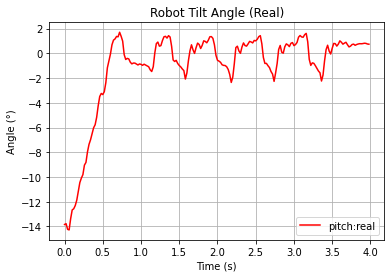

Episode :  1
Reward :  3000 2260
Leg raised :  n

Init x: 0.09, y : -10.79

Overshoot x: 0.55, y : 2.04
Rise time x : 0.00, y : 0.50


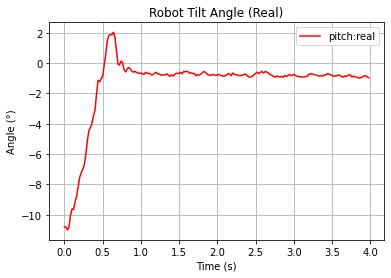

Episode :  2
Reward :  3000 2610
Leg raised :  n

Init x: -0.39, y : -8.53

Overshoot x: 0.19, y : 1.98
Rise time x : 0.00, y : 0.38


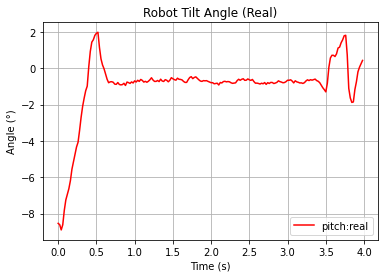

Episode :  3
Reward :  3000 2620
Leg raised :  n

Init x: -0.21, y : -6.17

Overshoot x: 0.10, y : 2.13
Rise time x : 0.00, y : 0.28


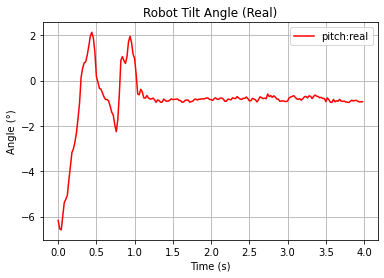

Episode :  5
Reward :  2670 2340
Leg raised :  n

Init x: -1.21, y : 8.91

Overshoot x: -0.43, y : 2.02
Rise time x : 0.04, y : 0.38


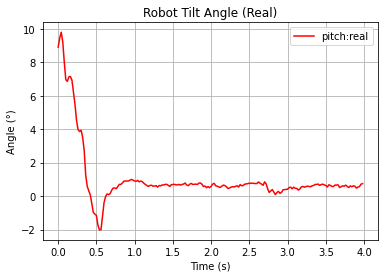

Episode :  7
Reward :  0 2250
Leg raised :  n

Init x: -2.35, y : 10.02

Overshoot x: -1.61, y : 2.62
Rise time x : 0.00, y : 0.48


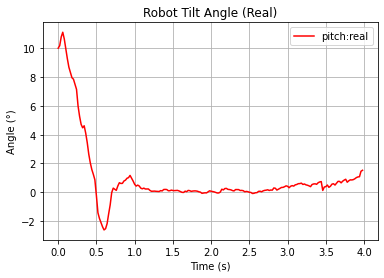

In [ ]:
# episode = np.random.randint(0,289)
# episode  = random.choice(index_full)
def showGraph(episode):
  imu_x = df["data.imu_x"][episode]
  imu_y = df["data.imu_y"][episode]
  servo_y = df["data.servo_y"][episode]
  index = df["data.index"][episode]
  set_point = [0 for i in range(300)]
  time = [i*(1/50) for i in range(300)]

  print("Episode : ", episode)
  print("Reward : ", df["reward_x"][episode], df["reward_y"][episode])
  print("Leg raised : ", df["legs raised"][episode])
  print("\nInit x: {:.2f}, y : {:.2f}".format(df['data.imu_x'][episode][0], df['data.imu_y'][episode][0]))
  print("\nOvershoot x: {:.2f}, y : {:.2f}".format(calculate_overshoot(imu_x), calculate_overshoot(imu_y)))
  print("Rise time x : {:.2f}, y : {:.2f}".format(calculate_rise_time(time, imu_x), calculate_rise_time(time, imu_y)))


  fig, ax = plt.subplots()
  ax.plot(time[:-100], imu_y[:-100], label="pitch:real", color="red")
  ax.set(title = "Robot Tilt Angle (Real)",
        xlabel = "Time (s)",
        ylabel = "Angle (°)")

  plt.legend()
  plt.grid()
  plt.show()

for i in index_full:
  showGraph(i)

In [ ]:
time = [i*(1/50) for i in range(300)]
dt_rise_time = []
dt_overshoot = []
init_imu_y = []

for i in range(len(df)):
  dt_rise_time.append(calculate_rise_time(time, df["data.imu_y"][i]))
  dt_overshoot.append(calculate_overshoot(df["data.imu_y"][i]))
  init_imu_y.append(df["data.imu_y"][i][0])

df_filter = df.copy()
df_filter['rise_time'] = dt_rise_time
df_filter['overshoot'] = dt_overshoot
df_filter['new_init_imu_y'] = init_imu_y
# df_filter = df_filter[df_filter['reward_x'] > 1000]
df_filter = df_filter.drop(['init_imu_y', 'reward_x', 'last_imu_x', 'init_imu_x', 'data.index', 'data.imu_y', 'data.imu_x', 'data.act_x', 'data.act_y', 'data.servo_y', 'data.servo_x'], axis=1)
df_filter.to_excel("testing_oped_pitch.xlsx")  
df_filter

,index,legs raised,episode,reward_y,last_imu_y,rise_time,overshoot,new_init_imu_y
0,300,n,0,2170,0.857183,0.58,1.707919,-13.836548
1,300,n,1,2260,-0.542715,0.50,2.041267,-10.790075
2,300,n,2,2610,0.234602,0.38,1.977271,-8.534065
3,300,n,3,2620,-0.114692,0.28,2.132621,-6.170149
4,300,n,4,1810,-1.140330,0.28,2.150455,5.925946
5,300,n,5,2340,-1.235209,0.38,2.022488,8.905514
6,300,n,6,1340,-0.733292,0.52,2.254026,11.075552
7,300,n,7,2250,-0.158338,0.48,2.624975,10.019906
8,300,n,8,1420,0.846939,0.70,2.290686,15.344884


###roll and pitch

In [ ]:
path = "/content/OpedQuadruped/oped/oped_teleopp/rewards/test_oped/2"
list_dir = sorted(os.listdir(path))
list_dir

['reward_26-01-2022_09-40.json',
 'reward_26-01-2022_11-07.json',
 'reward_26-01-2022_11-46.json']

In [ ]:
with open(os.path.join(path, list_dir[1])) as f:
    data = json.load(f)

data_keys = data[0].keys()
data_sub_keys = data[0]["data"].keys()
print(data_keys)
print(data_sub_keys)

dict_keys(['index', 'legs raised', 'episode', 'last_imu_x', 'reward_y', 'reward_x', 'last_imu_y', 'data', 'init_imu_y', 'init_imu_x'])
dict_keys(['index', 'imu_y', 'imu_x', 'act_x', 'act_y', 'servo_y', 'servo_x'])


In [ ]:
data_testing = []
for i in range(len(list_dir)):
  with open(os.path.join(path, list_dir[i])) as f:
      data = json.load(f)
      print(list_dir[i], len(data))
      for j in range(len(data)):
        data_testing.append(data[j])

print(len(data_testing))

reward_26-01-2022_09-40.json 7
reward_26-01-2022_11-07.json 27
reward_26-01-2022_11-46.json 13
47


In [ ]:
df = pd.json_normalize(data_testing)
# df.head()

In [ ]:
index_full = []
index = df.index[df['reward_x'] > 1000].tolist()
for id in index:
  if df['reward_y'][id] > 1000 and df['legs raised'][id] == 'n' and abs(df['data.imu_x'][id][0]) > 7 and abs(df['data.imu_x'][id][0]) < 14 and abs(df['data.imu_y'][id][0]) > 7 and abs(df['data.imu_y'][id][0]) < 14:
    index_full.append(id)

print(index_full)
print(len(index_full))

[11, 12, 35]
3


Episode :  11
Reward :  1270 1890
Leg raised :  n

Init x: 7.29, y : -11.17

Overshoot x: 5.10, y : 3.82
Rise time x : 0.38, y : 0.54


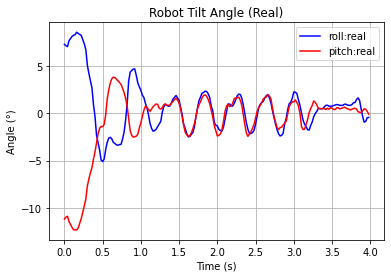

Episode :  12
Reward :  2280 2300
Leg raised :  n

Init x: 11.99, y : -9.66

Overshoot x: 3.64, y : 2.41
Rise time x : 0.56, y : 0.56


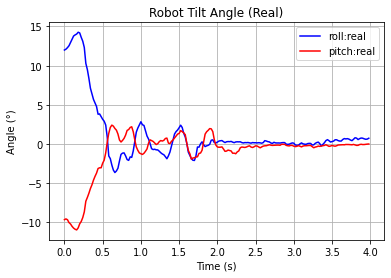

Episode :  35
Reward :  1410 2500
Leg raised :  n

Init x: -11.13, y : 12.38

Overshoot x: 3.86, y : 2.31
Rise time x : 0.58, y : 0.60


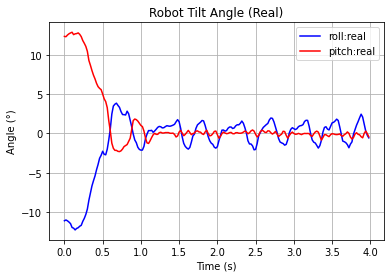

In [ ]:
# episode = np.random.randint(0,289)
# episode  = random.choice(index_full)
def showGraph(episode):
  imu_x = df["data.imu_x"][episode]
  imu_y = df["data.imu_y"][episode]
  servo_y = df["data.servo_y"][episode]
  index = df["data.index"][episode]
  set_point = [0 for i in range(300)]
  time = [i*(1/50) for i in range(300)]

  print("Episode : ", episode)
  print("Reward : ", df["reward_x"][episode], df["reward_y"][episode])
  print("Leg raised : ", df["legs raised"][episode])
  print("\nInit x: {:.2f}, y : {:.2f}".format(df['data.imu_x'][episode][0], df['data.imu_y'][episode][0]))
  print("\nOvershoot x: {:.2f}, y : {:.2f}".format(calculate_overshoot(imu_x), calculate_overshoot(imu_y)))
  print("Rise time x : {:.2f}, y : {:.2f}".format(calculate_rise_time(time, imu_x), calculate_rise_time(time, imu_y)))


  fig, ax = plt.subplots()
  # ax.plot(time, set_point, label="set_point", color="black")
  ax.plot(time[:-100], imu_x[:-100], label="roll:real", color="blue")
  ax.plot(time[:-100], imu_y[:-100], label="pitch:real", color="red")
  # Set plot title and axes labels
  ax.set(title = "Robot Tilt Angle (Real)",
        xlabel = "Time (s)",
        ylabel = "Angle (°)")

  plt.legend()
  plt.grid()
  plt.show()

# for i in range(len(data_testing)):
for i in index_full:
  showGraph(i)

In [ ]:
time = [i*(1/50) for i in range(300)]
dt_rise_time_x = []
dt_overshoot_x = []
dt_rise_time_y = []
dt_overshoot_y = []
init_imu_x = []
init_imu_y = []

for i in range(len(df)):
  dt_rise_time_x.append(calculate_rise_time(time, df["data.imu_x"][i]))
  dt_overshoot_x.append(calculate_overshoot(df["data.imu_x"][i]))
  init_imu_x.append(df["data.imu_x"][i][0])
  dt_rise_time_y.append(calculate_rise_time(time, df["data.imu_y"][i]))
  dt_overshoot_y.append(calculate_overshoot(df["data.imu_y"][i]))
  init_imu_y.append(df["data.imu_y"][i][0])

df_filter = df.copy()
df_filter['rise_time_x'] = dt_rise_time_x
df_filter['overshoot_x'] = dt_overshoot_x
df_filter['new_init_imu_x'] = init_imu_x
df_filter['rise_time_y'] = dt_rise_time_y
df_filter['overshoot_y'] = dt_overshoot_y
df_filter['new_init_imu_y'] = init_imu_y
# df_filter = df_filter[df_filter['reward_x'] > 1000]
df_filter = df_filter.drop(['init_imu_x', 'init_imu_y', 'data.index', 'data.imu_y', 'data.imu_x', 'data.act_x', 'data.act_y', 'data.servo_y', 'data.servo_x'], axis=1)
df_filter

,index,legs raised,episode,last_imu_x,reward_y,reward_x,last_imu_y,rise_time_x,overshoot_x,new_init_imu_x,rise_time_y,overshoot_y,new_init_imu_y
0,300,y,0,-2.439985,0,0,-2.808092,0.00,-2.643511,-16.497946,0.00,-2.516828,-14.853251
1,300,y,1,1.549094,500,660,-1.919624,0.56,2.891279,-12.406017,0.70,6.770750,-13.094488
2,300,n,2,0.946729,740,570,-0.292689,0.36,5.389294,-5.903452,0.74,3.554526,-16.139973
3,300,n,3,-0.142787,1720,1540,0.586638,0.14,3.673958,1.569774,0.74,2.365838,-15.546612
4,300,n,4,0.692163,2460,1620,-0.064472,0.34,5.927225,5.436402,0.70,2.882525,-16.024693
5,300,y,5,0.395562,2290,2470,-0.576152,0.64,2.858330,11.494800,0.86,3.318432,-15.732249
6,300,y,6,0.178772,640,2490,-0.832956,1.02,-0.037312,16.137999,0.90,-0.567748,-15.585580
7,300,n,0,-0.122200,670,980,-1.940936,0.76,3.659818,-16.174671,0.54,3.235722,-10.406332
8,300,n,1,-2.302433,690,720,2.708425,0.64,9.267168,-11.178002,0.66,6.529993,-11.420400
9,300,n,2,-0.748737,730,530,1.084193,0.34,4.806488,-5.810335,0.58,4.645941,-11.848240


In [ ]:
df_filter.to_excel("testing_oped.xlsx")  

###on floor

In [ ]:
path = "/content/OpedQuadruped/oped/oped_teleopp/rewards/test_oped/3"
list_dir = sorted(os.listdir(path))
list_dir

['reward_26-01-2022_12-06.json']

In [ ]:
data_testing = []
for i in range(len(list_dir)):
  with open(os.path.join(path, list_dir[i])) as f:
      data = json.load(f)
      print(list_dir[i], len(data))
      for j in range(len(data)):
        data_testing.append(data[j])

print(len(data_testing))

reward_26-01-2022_12-06.json 14
14


In [ ]:
df = pd.json_normalize(data_testing)
# df.head()

In [ ]:
index_full = []
index = df.index[df['reward_x'] > 2000].tolist()
for id in index:
  if df['reward_y'][id] > 2000 and df['legs raised'][id] == 'n':
    index_full.append(id)

print(index_full)
print(len(index_full))

[1, 2, 4, 6]
4


Episode :  0
Reward :  2000 2180
Leg raised :  n

Init x: 2.10, y : -13.74

Overshoot x: 3.89, y : 3.88
Rise time x : 0.14, y : 0.68


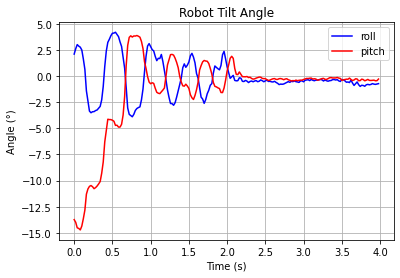

Episode :  1
Reward :  2120 2960
Leg raised :  n

Init x: -12.04, y : 0.25

Overshoot x: 2.33, y : 1.23
Rise time x : 0.50, y : 0.00


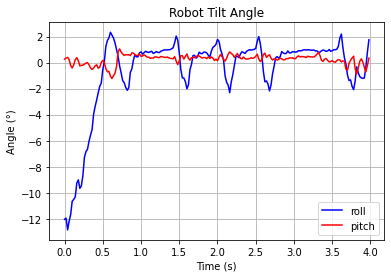

Episode :  2
Reward :  2360 2060
Leg raised :  n

Init x: 2.60, y : 14.50

Overshoot x: 5.19, y : 4.21
Rise time x : 0.18, y : 0.72


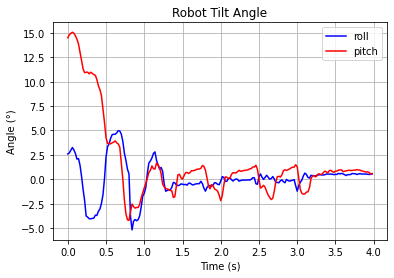

Episode :  3
Reward :  1930 2610
Leg raised :  n

Init x: 15.13, y : -1.83

Overshoot x: 2.38, y : 2.03
Rise time x : 0.58, y : 0.12


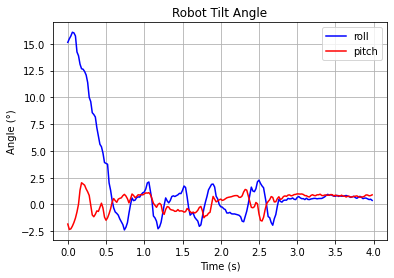

Episode :  4
Reward :  2430 2660
Leg raised :  n

Init x: 1.74, y : 7.66

Overshoot x: 2.88, y : 2.95
Rise time x : 0.10, y : 0.36


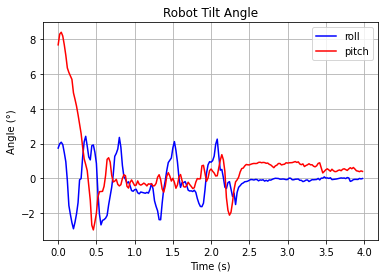

Episode :  5
Reward :  1370 1980
Leg raised :  n

Init x: 8.75, y : 1.10

Overshoot x: 2.97, y : 2.55
Rise time x : 0.34, y : 0.10


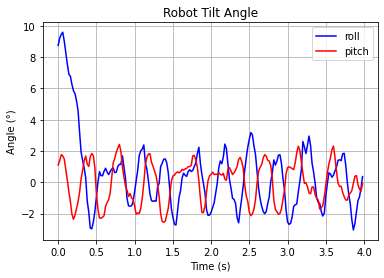

Episode :  6
Reward :  2450 2110
Leg raised :  n

Init x: 3.03, y : -8.19

Overshoot x: 5.30, y : 3.54
Rise time x : 0.24, y : 0.42


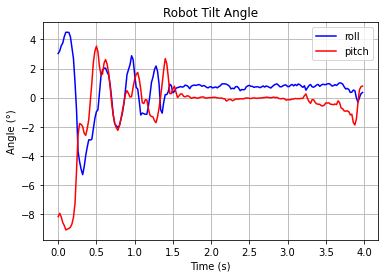

Episode :  7
Reward :  1160 1630
Leg raised :  n

Init x: -7.73, y : -0.37

Overshoot x: 2.55, y : 1.97
Rise time x : 0.32, y : 0.00


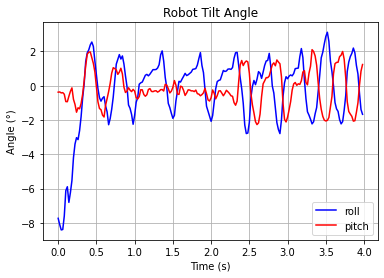

Episode :  8
Reward :  1850 1700
Leg raised :  n

Init x: -7.04, y : -11.42

Overshoot x: 5.78, y : 2.32
Rise time x : 0.40, y : 0.50


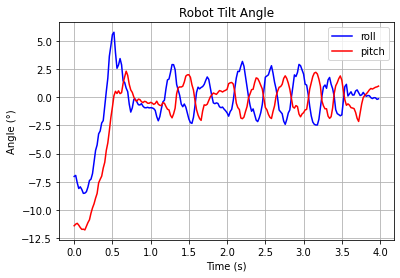

Episode :  9
Reward :  1240 2150
Leg raised :  n

Init x: 11.19, y : -10.79

Overshoot x: 6.29, y : 4.40
Rise time x : 0.54, y : 0.56


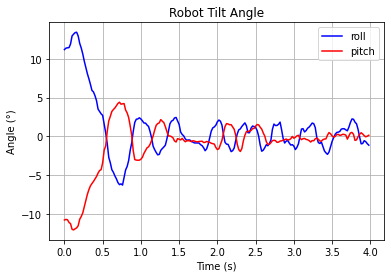

Episode :  10
Reward :  1860 1750
Leg raised :  n

Init x: -8.35, y : 10.35

Overshoot x: 5.31, y : 2.62
Rise time x : 0.82, y : 0.50


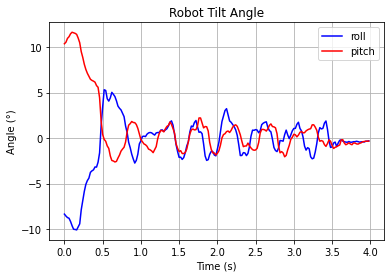

Episode :  11
Reward :  2690 2690
Leg raised :  y

Init x: 11.12, y : 11.87

Overshoot x: -0.06, y : 0.25
Rise time x : 0.62, y : 0.62


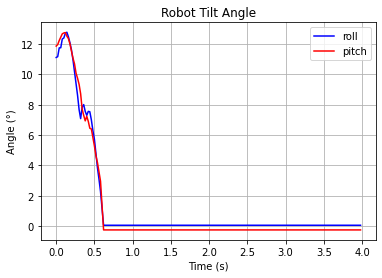

Episode :  12
Reward :  1650 2360
Leg raised :  n

Init x: -9.94, y : 12.38

Overshoot x: 4.76, y : 2.61
Rise time x : 0.52, y : 0.56


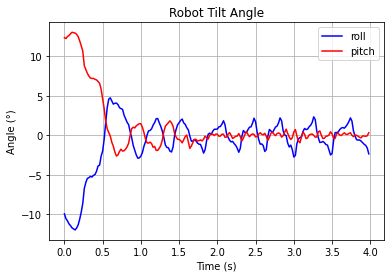

Episode :  13
Reward :  1990 1630
Leg raised :  n

Init x: -0.75, y : 11.38

Overshoot x: 3.16, y : 2.56
Rise time x : 0.00, y : 0.52


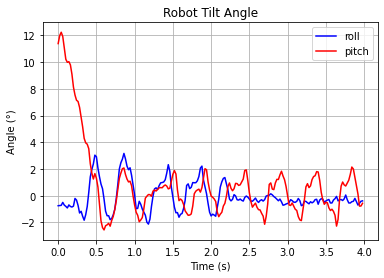

In [ ]:
# episode = np.random.randint(0,289)
# episode  = random.choice(index_full)
def showGraph(episode):
  imu_x = df["data.imu_x"][episode]
  imu_y = df["data.imu_y"][episode]
  servo_y = df["data.servo_y"][episode]
  index = df["data.index"][episode]
  set_point = [0 for i in range(300)]
  time = [i*(1/50) for i in range(300)]

  print("Episode : ", episode)
  print("Reward : ", df["reward_x"][episode], df["reward_y"][episode])
  print("Leg raised : ", df["legs raised"][episode])
  print("\nInit x: {:.2f}, y : {:.2f}".format(df['data.imu_x'][episode][0], df['data.imu_y'][episode][0]))
  print("\nOvershoot x: {:.2f}, y : {:.2f}".format(calculate_overshoot(imu_x), calculate_overshoot(imu_y)))
  print("Rise time x : {:.2f}, y : {:.2f}".format(calculate_rise_time(time, imu_x), calculate_rise_time(time, imu_y)))


  fig, ax = plt.subplots()
  # ax.plot(time, set_point, label="set_point", color="black")
  ax.plot(time[:-100], imu_x[:-100], label="roll", color="blue")
  ax.plot(time[:-100], imu_y[:-100], label="pitch", color="red")
  # Set plot title and axes labels
  ax.set(title = "Robot Tilt Angle",
        xlabel = "Time (s)",
        ylabel = "Angle (°)")

  plt.legend()
  plt.grid()
  plt.show()

for i in range(len(data_testing)):
  showGraph(i)